___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors with Python

KNN is a classification algorithm non parametric and instance based learning algorithm used for classification and regression tasks. Based off it's neighboring points, it can predict what the target is

- KNN is often referred to as "lazy learner" because it does not explicitly learn a model during training, and defers the learning process until prediction time
- KNN does not make assumptions about underlying data distribution, it is flexible and can model complex decision boundaries
    - can capture complex relationships between features and target variables without assuming linearity (a.k.a assumptions made in certain statistical models that relationships between variables are proportionally related to each other in a straight line relationship)
- it is instance-based where predictions are made based on similarity of instances in the feature space
- Advantages over other algorithms when they are nonlinear/complex decision boundaries, KNN is *robust to noisy data, multi-class classification, lazy learner, good for small to medium datasets, feature scaling (does not assume scale or distribution of features), prototype-based learning (centroids where it can classify new instances based on their similarity to existing prototypes without requiring explicit probabilistic model), imbalanced datasets* 

1. initialization: choose a value for hyperparameter "K" which represents the number of nearest neighbors to consider (this value is typically chosen based on domain knowledge, experimentation, or cross-validation)
2. training: training in KNN involves storing all available examples and their corresponding labels and unlike other algorithms, KNN does not explicitly train a model; instead, it memorizes the entire training dataset
3. prediction (classification): per given query instance (unlabeled data point), the algorithm calculates the distance between the query instance and all examples in the training dataset (common distance metrics include Euclidian distance, Manhattan distance, or cosine similarity), then it identifies the K-nearest neighbors to the query instance basde on the calculated distances and finally, assigns the class label to the query instance based on the majority class among its k nearest neighbors (in other words, predicted class is determined by majority vote among the k neighbors
4. prediction (regression): for regression tasks, the prediction is based on average or weighted average of the target variable values of the k nearest neighbors and instead of assigning class labels, KNN computes the average (or weighted average) of the target variable values of the k nearest neighbors and assigns this as the predicted value for the query instance
5. evaluation: after making predictions for all query instances in the testing dataset, the model's performance is evaluated using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, mean squared error, etc.

- the math behind KNN can be found in Introduction to Statistical Learning Chapter 4 by Gareth James


Pros: 
- very simple, training is trivial
- works with any number of classes
- easy to add more data, very few parameters ("K" and "Distance Metric")
    - distance metric is mathematically defining the distance between new test point and old training point
- it's good in scenarios with anonymized 

Cons:
- high prediction and computation cost (worse for large data sets)
    - because you sort a large dataset, there is a high prediction cost and testing out what point is closest to new datapoint
        - it costs a lot of compute for large datasets
- not good with high-dimensional data
- categorical features don't work well

## KNN Algorithm Breakdown:

Training Algorithm:
- stores all the data

Prediction Algorithm:
- calculate the distance from "x" ("x" indicates particular new datapoint) to all points in your data
- then sort the points in your data by increasing distance from "x"
- predict the majority label of the "k" (a number) closest points

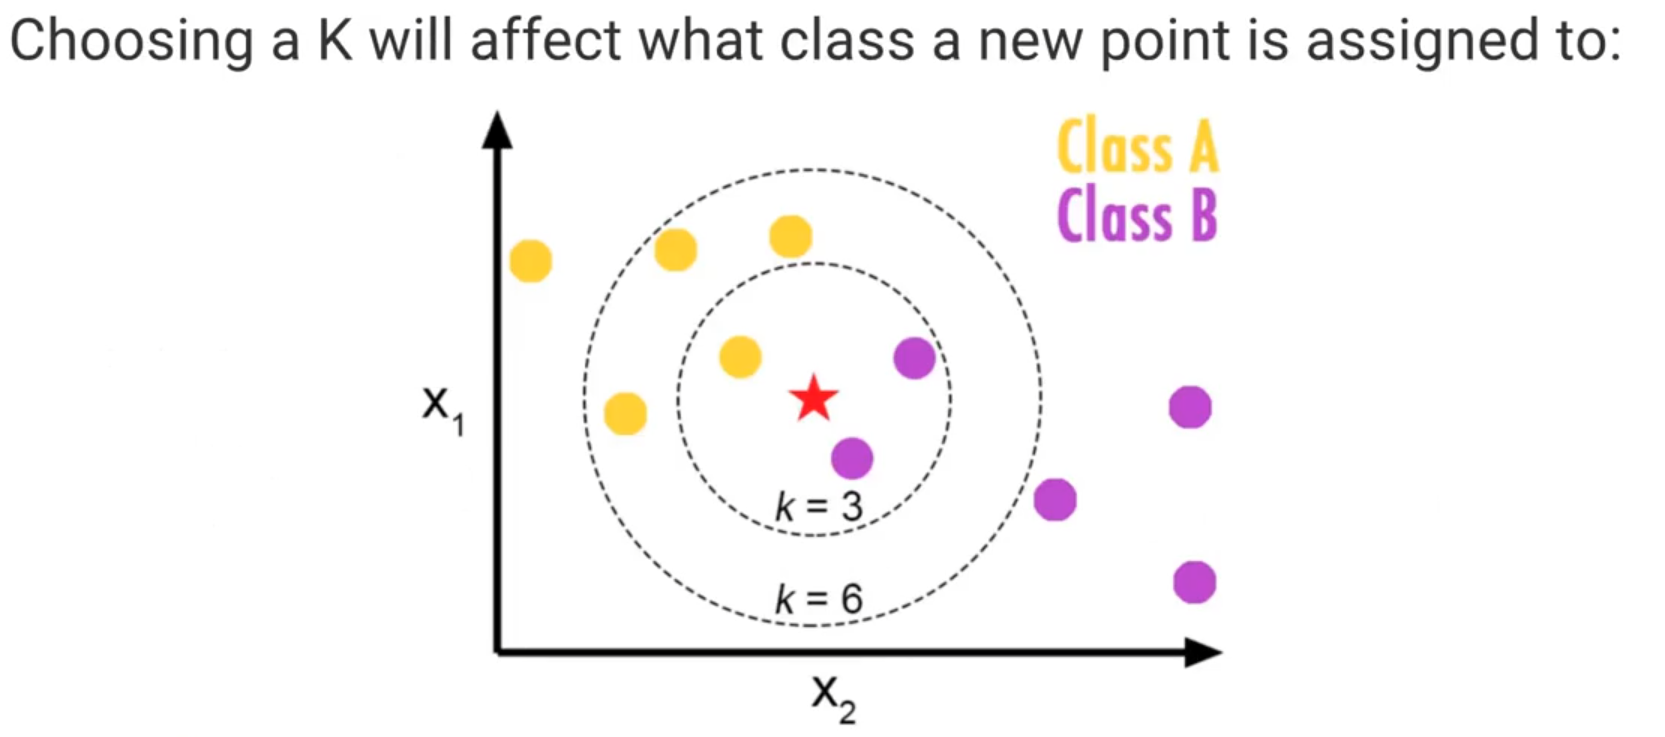

KNN is the technique of supervised learning algorithm used for classification

K-means on the other hand is unsupervised learning algorithm for clustering data into K-clusters, data partitioning


red star (Centroid) is the point in the data cluster

- if k=3, we select the 3 nearest neighbors to the red star (2 purple Class B, and 1 yellow Class A), belonging to Class B
- however, if we set k=6, then the 6 nearest neighbors would be 4 yellow and 2 purple, belonging to Class A
- choosing a k will affect the prediction and what class a new point is assigned to
    - as K increases in number, we start to see the model (visually) has a bias
    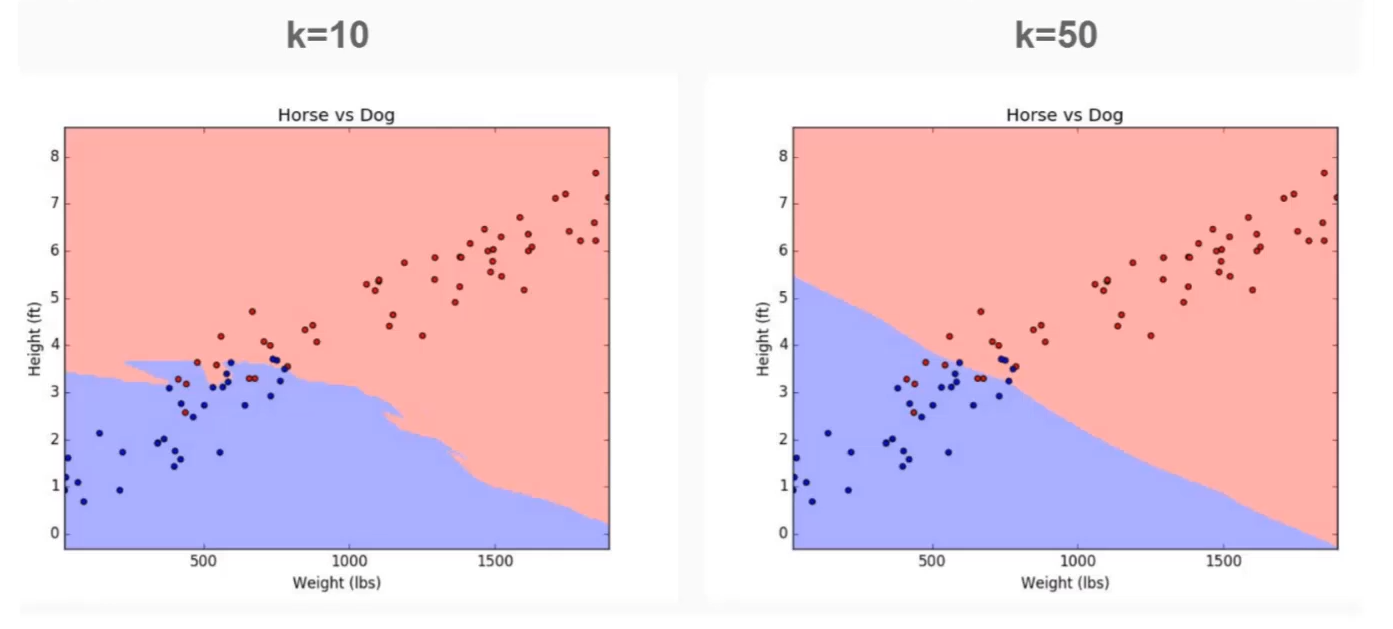
    
How do we determine what "k" value? 

We can use the Elbow method or sort the nearest neighbors by distances in increasing order. For classification problems, the point is classified by the vote of its neighbors (meaning which class has the most nearest neighbors)

We can determine this by cross-validation and learning curve
- cross validation: splitting the dataset into multiple subset (folds) and training KNN model on the subset of data, and evaluating the performance on remaining data
    - ensures "k" performs well on unseen data
- learning curve (how the model cahnges as amount of training data increases) plots model's performance metrics (accuracy) against the training set size or k-value
    - a "validation" curve might be appropriate where the performance metric is plotted against different values of "k" 
    - by observing the trend of learning curve, you can identify the optimal "k" value that balances bias and variance
        - learning curve can provide info on whether the model is properly fitting, optimal "k" is often chosen based on the point where the performance metric stabilizes or meets a peak

"k" value controls balance between underfitting and overfitting and so should balance both
    
 

To calculate the given point relative to other points, the measurement of distance can be calculated via Euclidean or Manhattan blocks. 

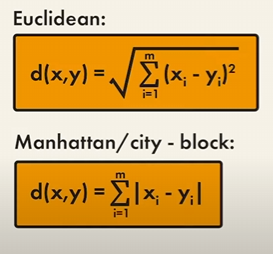

- euclidean is the most commonly used function

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [5]:
df = pd.read_csv('Classified Data', index_col=0)

In [6]:
df.head()

# we don't know what the values or columns represent (unknown data) 
# we have to use KNN to predict target class (1 or 0)

# because the KNN classifier predicts the class of a given test observation by identifying the observations nearest it, the 
# scale of the variable matters a lot, and any variables on the large scale will have a larger effect on the distance between
# observations

# because we are using KNN as a classifier, we will want to standardize everything to the same scale

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
df.info()

#1000 total sample size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Standardize the Variables

scaling variables in standardization (also known as feature scaling) involves transforming the range of the variable values to a standard scale, which involves (typically) subtracting the mean of the variable and then dividing by the standard deviation
- this results in distribution with a mean of 0 and a standard deviation of 1 (adjusting them so they have consistent scale and dsitribution, to make it easier for ML algorithms to interpret data)
    - consistent scale and distribution refer to having the variables in a dataset transformed in such a way that they exhibit similar characteristics in terms of their spread and range
        - scale consistency: one variable might range from 0 to 100 while another ranges from 0 to 10,000, so scaling them allows them both to have common ranges or somewhere near that (no single variable dominates analysis)
        - distribution consistency: variables after scaling have similar shapes, spread, and central tendencies (i.e. mean, standard deviation), and most of the time end up being normally distributed after scaling (although not always the case)

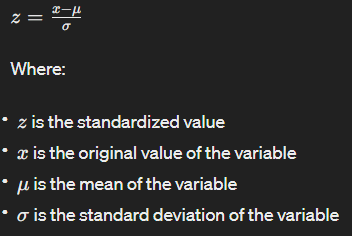

it prevents variables with larger magnitudes from dominating the analysis and improving the convergence speed of gradient-descent based algorithms, and helps in comparing coefficients obtained from models fitted on different variables 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# instance StandardScaler() like how we would with LogisticRegression()

scaler = StandardScaler()

In [10]:
# we want to fit to data, not target class

scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
# then use the scaler object to do a transformation

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

# ".transform()" performs the standardization by centering and scaling when the object is created + fitted

In [12]:
scaled_features

# notice how we have an array of values, this is the scaled version of actual values (even though the actual values are quite 
# close to each other, most of the time in the real-world, they won't be)

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
df.columns

# but we don't want 'TARGET CLASS' so we do slice notation to remove it

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [14]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [15]:
# use scaled_features variable to create a scaled dataframe

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

# we have standardized version of our data, ready to put into KNN algorithm (that really depends on the distance between each
# feature)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_feat
y = df['TARGET CLASS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1 and then use Elbow method to choose a correct "k" value

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

# n_neighbors is the number of neighbors we want for this model (which is also known as "k")

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
predictions = knn.predict(X_test)

predictions

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

## Predictions and Evaluations

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))

# ALWAYS PASS IN Y_TEST AS FIRST ARGUMENT AND PREDICTIONS AS SECOND

[[151   8]
 [ 15 126]]


In [24]:
print(classification_report(y_test,predictions))

# our model is actually performing decently well with decent scores
# but can we squeeze in even more performance from a better "k" value

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [25]:
# 300 test sample size

## Choosing a K Value (Elbow Method)

What is Elbow Method? 

It's a method used for determining optimal number of clusters ("k") in a surrounding k-means clustering algorithm. It involves "within-cluster sum of squares" (WCSS) or some other clustering metric AGAINST the number of clusters ("k")

For every value of "k" within a certain range we are considering, we are performing an algorithm or a set of algorithms to pick different values of "k" and determine which one is the best one by evaluating each "k" and picking the one that gives the best result (typically with the best/lowest error rate) and then we plot that on a graph

It's called the "Elbow" method because we are picking the point in which the curve bends/folds, resembling a human elbow (inflection point)
- When you don't see marginal improvement in the error rate, we can pick that point that began the improvement, and stop increasing "k"-value

In [26]:
# set error rate to an empty list
error_rate = []

# iterate many models, and plot out their error rate, and see which one has the lowest error rate

for i in range(1,40):
# this will check the possible "k" values from 1-40 (not including 40)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test) # knn is making predictions on test set of data, and storing them in predictions_i
    # these stored values can be later used in classification_report to come up with accuracy
    error_rate.append(np.mean(predictions_i != y_test)) # average of where my predictions were not equal to actaul y_test values
    # "predictions_i != y_test" is comparing the predicted labels "predictions_i" with actual labels "y_test" (of the 300
    # predictions, returning a boolean array where "True" indicates a misclassification (where predicted labels doesn't match 
    # the actual labels)
    
    # then, "np.mean()" calculates the mean of the boolean array obtained from the comparison since "True" is the same as "1" in
    # value and "False" is "0", this means it can compute the error rate based on the proportion of misclassifications 
    
    # then, append each one to the empty "error_rate[]" list

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Here's a way to visually see how the error rate is being calculated 
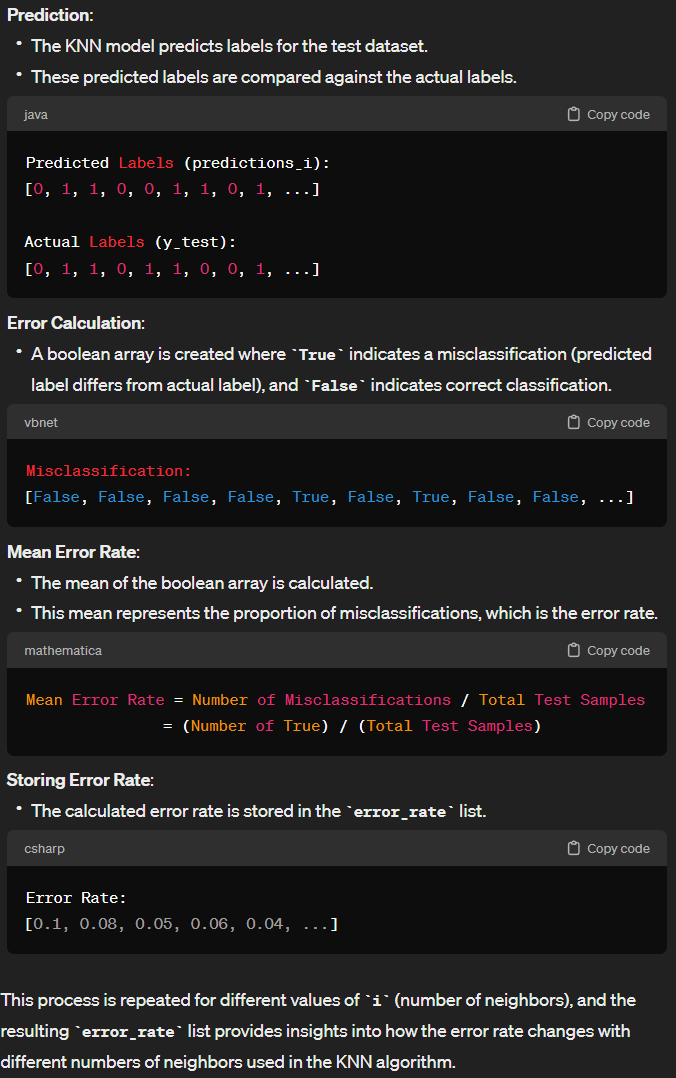

- the Total Test Sample in this case is 300 because we split 1000 dataset to have a "test_size=0.3" (30% of 1000)
    - so it's number of misclassifications out of 300 = error rate (then stored in the empty list)
    

In [39]:
# the code works fine with the warning above, but if you want to surpress it, here's a way

import warnings

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        knn.fit(X_train, y_train)
        predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

In [31]:
error_rate

# this is not really readable, but these are our error rates -- so we should just plot this out

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

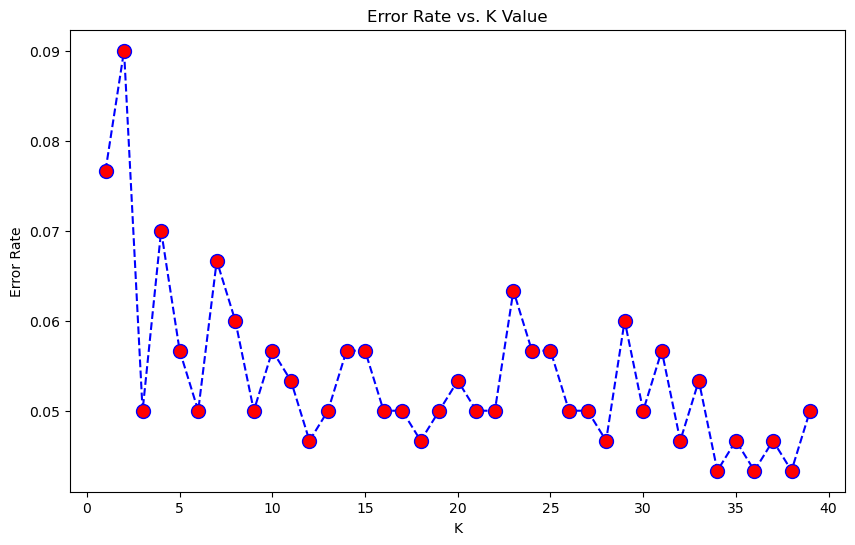

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# we should choose 17 because k value of "34" might result in 0.01 error rate lower, but it's almost double the k value
# also towards higher k values, we start to see some kind of oscillating up and down
# for other data, the curve might be smoother and not so bumpy, but it's bumpy because the error rate is already so low in this
# example

In [37]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
# now trying it with k=36

knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=36')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

# it's a little better 

WITH K=36


[[153   6]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Conclusion

- we were able to squeeze a few extra accuracy points out of a higher k number, however just a higher k value isn't always the best
- the choice of k depends on the underlying structure of the data 
    - overfitting: higher values of k can lead to smoother decision boundaries, but if k is too high, the model might become overly simplistic and fail to capture the underlying patterns (but this will depend on where/how far data points are from each other
    - uneven density: if the density (how densely packed 1 area of datapoints are vs. another being almost zero datapoints) of feature points vary significantly, smaller k can capture local patterns accurately
        - in high density regions, smaller k might be better at capturing relevance, while in sparse regions, larger k might be necessary to prevent overfitting 
    - higher k value means more compute needed to predict (brute forcing a high "k" value is not usually worth the compute cost)
        - whether this is a linear increase or exponential increase in compute depends on the algorithm implementation and data characteristics
        - brute-force apporaches where distance between query point and all training points are calculated directly can be computationally expensive (however, approximation nearest neighbor algorithms like KD-trees or ball trees can reduce the cost by narrowing the search space)
        - the more dimensions the data, the compute also increases (known as "the curse of dimensionality") - high dimensional spaces means notion of proximity is less meaningful, and algorithm may need to consider more neighbors to make accurate predictions
            - ex: image recognition (data points represent image with high dimensionality) - compute cost of KNN can is substantial
            - ex: recommendation system (user-item interactions - as user item matrix size increases (or users increase), the algorithm's complexity increases, costing more compute
            - ex: anomaly detection (fraud detection) - KNN compute depends on the dataset of the feature space, efficient nearest search techniques are crucial for processing large volumes of data in real-time
    - imbalanced classes: if class distribution is imbalanced, smaller k can be more effective at capturing characteristics of minority class, higher k dilutes the influence of minority class leading to bias 
        - imbalance occurs when the observation in each class is not evenly distributed (one class/majority class may have significantly more instances than other classes)
            - ex: binary classification problem where one class represents normal instances and other class represents anomalies
                - normal instances might be much higher occurance, causing imbalance causing bias towards majority class, leading to poor performance on minority class, can affect the selection of the proper number "k" because smaller "k" may be necessary to ensure algorithm doesn't overindex on the majority class (like a sample size of 100 cats and dogs, and 95 are cats, 5 are dogs, a lower k number is better in this scenario than to use all 100 data points)
    
- to perfectly calculate choice of "k" you can perform cross validation or grid search
    - cross-validation assess how well the model generalizes unseen data by splitting dataset into multiple train_test_split and evaluating their performance
    - grid search involves systematically testing different values of k, selecting the one that yields best performance based on chosen evaluations of accuracy, precision, recall, f1-score
    - as k number increases, the influence of individual neighbors on the prediction decreases 
        - in "standard KNN", k neighbors have equal weight in decision making process, however in "weighted KNN", contribution of each neighbor to the prediction is weighted by its distance from query point
            - when k is large, neighbors further away from the query point (their weights may be smaller based off of distance rather than how many datapoints they are apart) which means predictions are influenced by a larger number of neighbors but each neighbor has less impact individually

## Recap

- import, read classified data, standardized to the same scale, created scaler object, did a fit to the features, then used scaler.transform() on those features to create scaled features, then put into dataframe to visualize it
- then split test and train data, set target class to y, fit the, and did KNN with a low K, checked out the eval, then used elbow method to plot out variety of k values, and choosed a better k value 